In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dir_path = './dataset/ipl/'
file_name = 'matches.csv'

match_data = pd.read_csv(dir_path+file_name)
match_data.head(3)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN


In [3]:
match_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

### Handling null values
<p> <em>Umpires</em> has lot of null values and is not significant for any further analysis. So drop these columns</p>

In [4]:
print('Rows: {}, Columns: {}'.format(match_data.shape[0], match_data.shape[1]))

Rows: 756, Columns: 18


In [5]:
match_data = match_data.iloc[:,:15]
match_data.isnull().sum()

id                 0
season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
dtype: int64

<p>There are 4 <em>no result</em> entries in the winner column. Better to drop these rows.</p>

In [6]:
match_data.dropna(axis=0, subset=['winner','result'], inplace=True)

### Gathering insights

In [7]:
seasons = sorted(match_data['season'].unique())
print('\033[1mSeasons:\033[0m {}, \nCount: {}'.format(seasons, len(seasons)))

print('\033[1mResult:\033[0m {}'.format(match_data['result'].unique()))
print('\033[1mToss decision:\033[0m {}'.format(match_data['toss_decision'].unique()))
print('\033[1mDL applied:\033[0m {}'.format(match_data['dl_applied'].unique()))

teams = pd.concat([match_data['team1'],match_data['team2']]).unique()
print('\033[1mTeams:\033[0m \n{}, \nCount: {}'.format(teams, len(teams)))
print('\033[1mCities:\033[0m \n{}'.format(match_data['city'].unique()))

Seasons: [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], 
Count: 12
Result: ['normal' 'tie']
Toss decision: ['field' 'bat']
DL applied: [0 1]
Teams: 
['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Delhi Daredevils' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Rising Pune Supergiants'
 'Delhi Capitals'], 
Count: 15
Cities: 
['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' nan
 'Mohali' 'Bengaluru']


<p>Clearly there are inconsistencies in the data: <strong>Teams</strong> has <em>Rising Pune Supergiant</em> and <em>Rising Pune Supergiants</em> while <strong>Cities</strong> has <em>Bengaluru</em> and <em>Bangalore</em></p>
Resolve these inconsistencies.

In [8]:
# 'Rising Pune Supergiant === Rising Pune Supergiants
match_data.replace('Rising Pune Supergiant', 'Rising Pune Supergiants', inplace = True)
teams = pd.concat([match_data['team1'],match_data['team2']]).unique()
print('\033[1mTeams:\033[0m \n{}, \nCount: {}'.format(teams, len(teams)))

# Bengaluru === Bangalore
match_data.replace('Bangalore','Bengaluru', inplace=True)
print('\033[1mCities:\033[0m \n{}'.format(match_data['city'].unique()))

Teams: 
['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiants' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Delhi Daredevils' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Delhi Capitals'], 
Count: 14
Cities: 
['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bengaluru' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' nan
 'Mohali']


### Toss wins by each team over all seasons

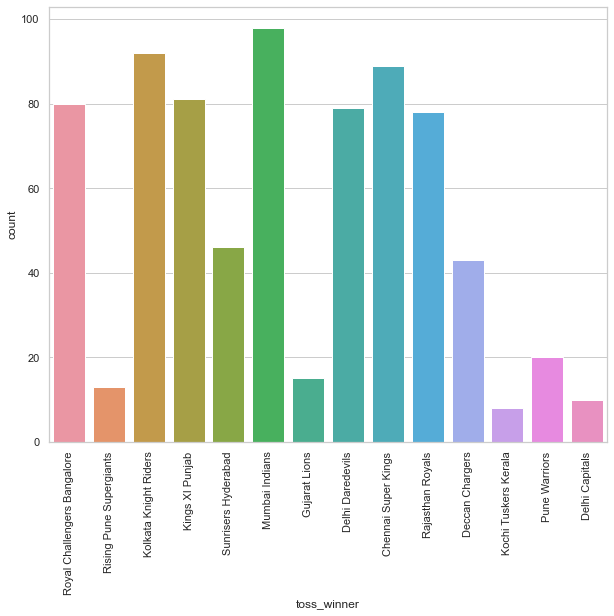

In [9]:
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style("whitegrid")
ax = sns.countplot(x='toss_winner', data=match_data)
ax.tick_params(axis='x', rotation=90)

### Get season wise information

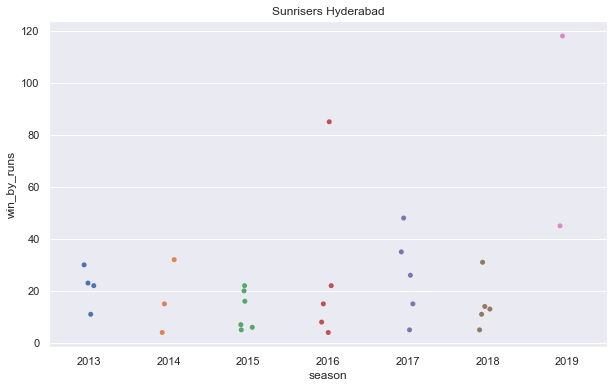

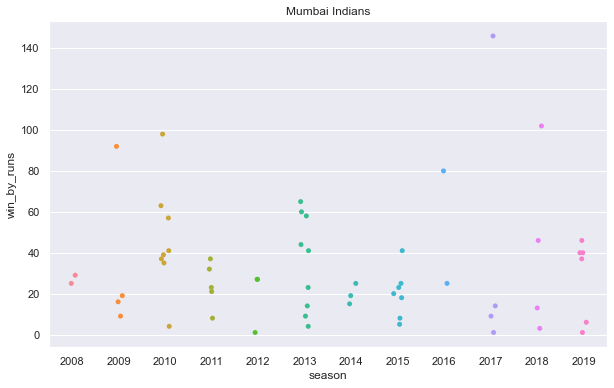

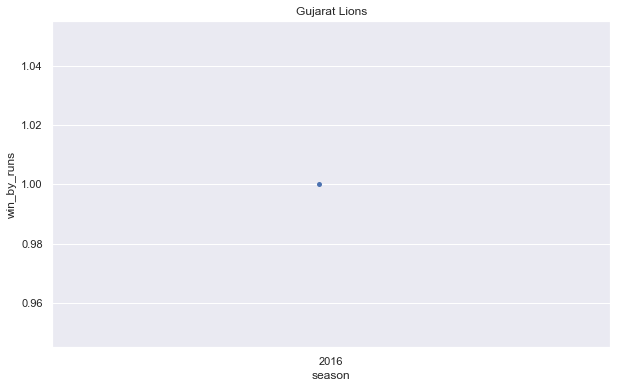

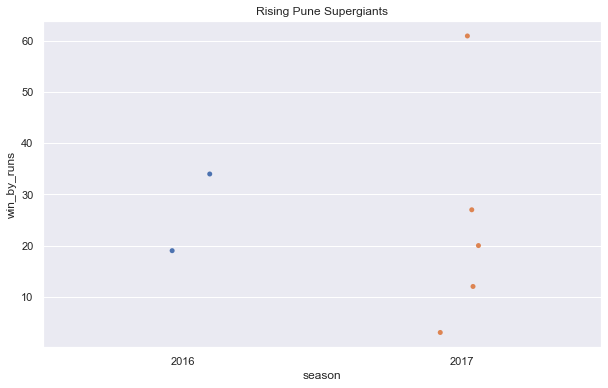

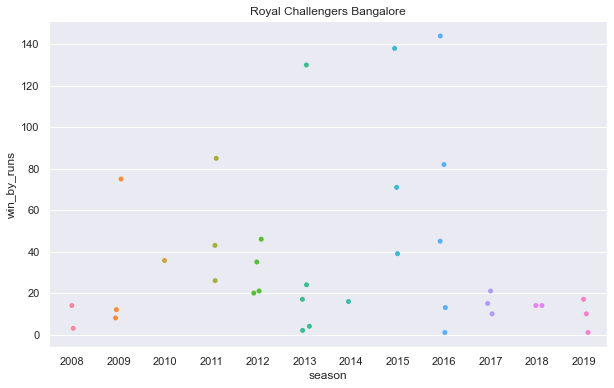

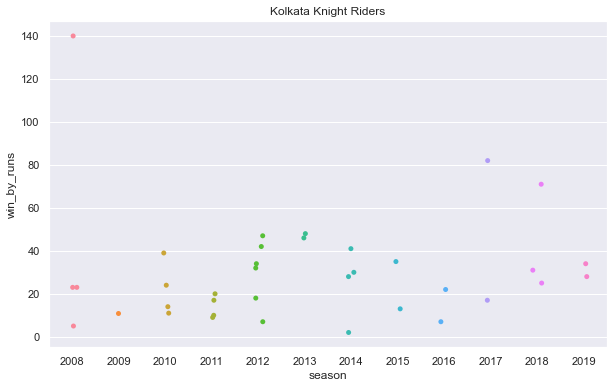

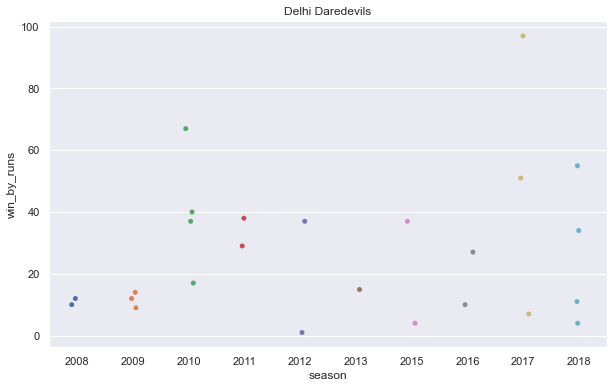

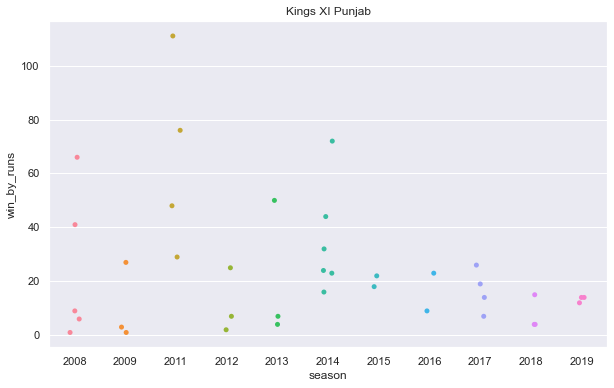

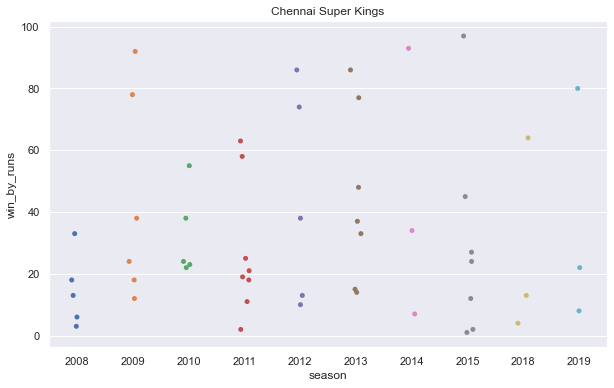

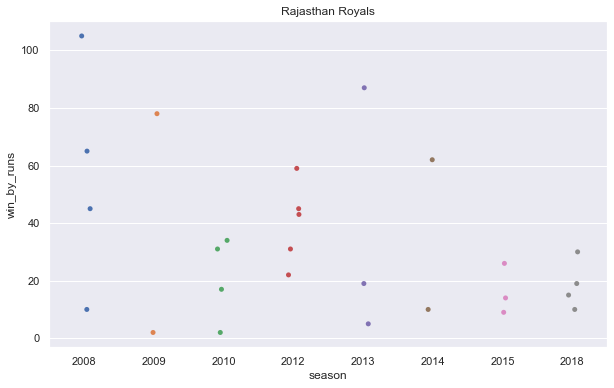

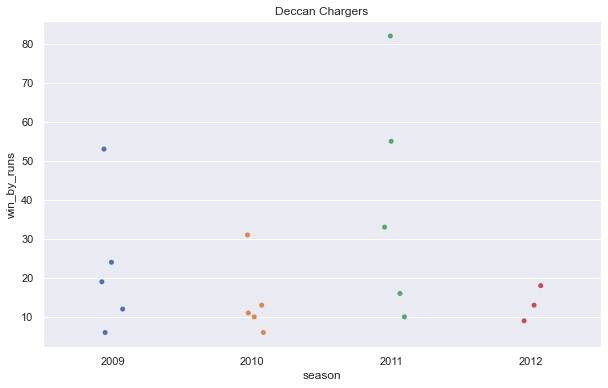

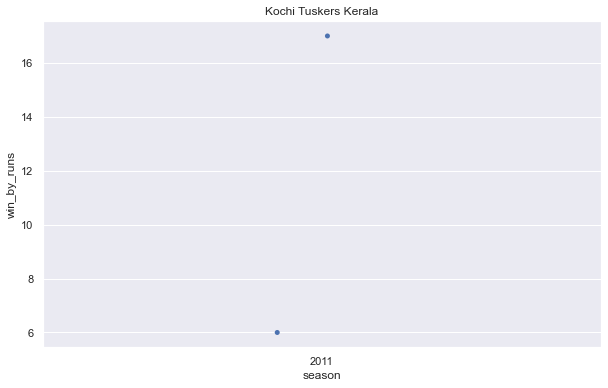

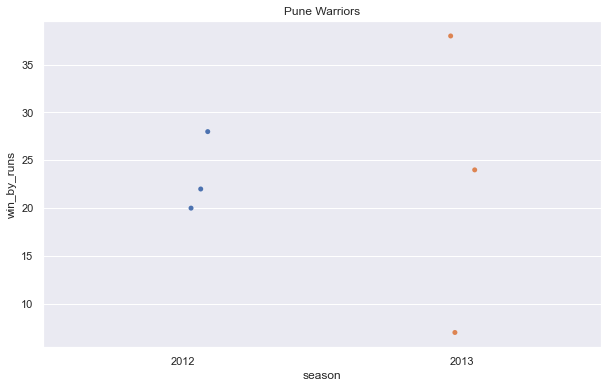

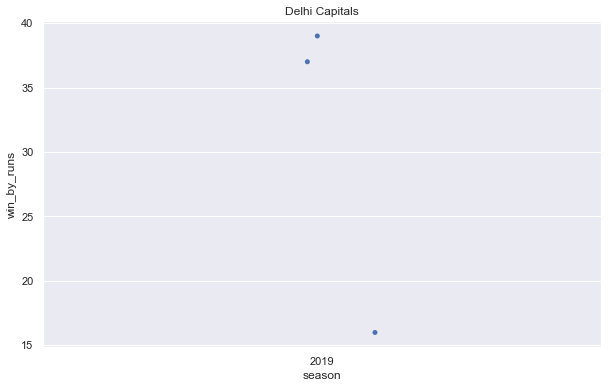

In [10]:
def get_info(team: str, season: int):
    subset = match_data.loc[(match_data['winner']==team) & (match_data[season]!=0)]
    sns.set(rc={'figure.figsize':(10,6)})
    sns.stripplot(x='season',y=season, data=subset).set(title = team)
    plt.show(sns)

for i in teams:
    get_info(i, 'win_by_runs')

In [11]:
group = match_data.groupby(['winner'])

toss_match = match_data[match_data['toss_winner'] == match_data['winner']]
toss_field = (toss_match[toss_match['toss_decision'] == 'field'])
toss_bat = (toss_match[toss_match['toss_decision'] == 'bat'])

print('Number of matches where the toss winner won the match: {}'.format(toss_match.shape[0]))
print('Number of matches where the toss winner who chose to field won the match: {}'.format(toss_field.shape[0]))
print('Number of matches where the toss winner who chose to bat won the match: {}'.format(toss_bat.shape[0]))

Number of matches where the toss winner won the match: 393
Number of matches where the toss winner who chose to field won the match: 259
Number of matches where the toss winner who chose to bat won the match: 134


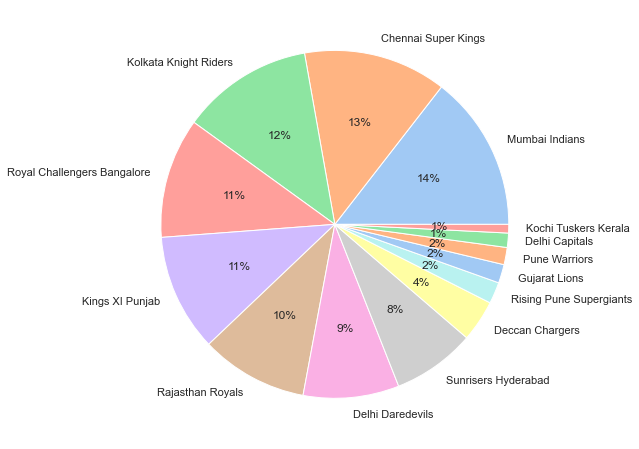

In [12]:
won = dict(match_data['winner'].value_counts())
labels = list(won.keys())
data = [won[i] for i in labels]
colors = sns.color_palette('pastel')[:len(data)]
plt.figure(figsize=(10,8))
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

### Wins of a team in a particular city

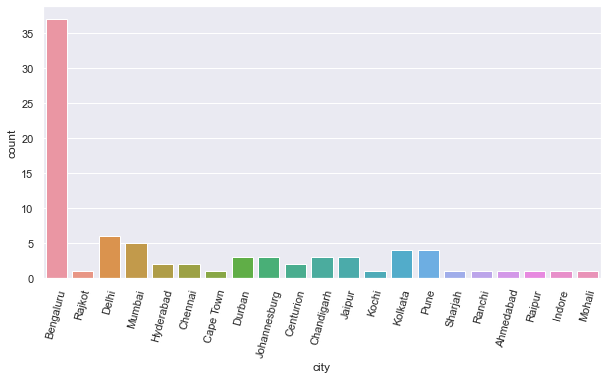

In [13]:
rcb_wins = match_data[match_data['winner'] == 'Royal Challengers Bangalore']
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.countplot(x='city', data=rcb_wins)
ax.tick_params(axis='x', rotation=75)

In [14]:
# sns.set(rc={'figure.figsize':(15,12)})
# ax = sns.catplot(x="city",col='winner', kind="count", data=match_data, height=7, aspect = 2)

***All teams have exceptional performance in home ground!***

In [15]:
# CSK Toss wins and match wins
csk_wins = match_data[(match_data['toss_winner'] == 'Chennai Super Kings') & (match_data['winner'] == 'Chennai Super Kings')].shape[0]
total_matches = match_data.shape[0]
win_percentage = csk_wins/total_matches * 100
print("Toss winner is CSK and match winner is also CSK", win_percentage)

Toss winner is CSK and match winner is also CSK 7.579787234042554


### Deliveries data

In [16]:
dir_path = './dataset/ipl/'
file_name = 'deliveries.csv'

deliveries = pd.read_csv(dir_path + file_name)

In [17]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

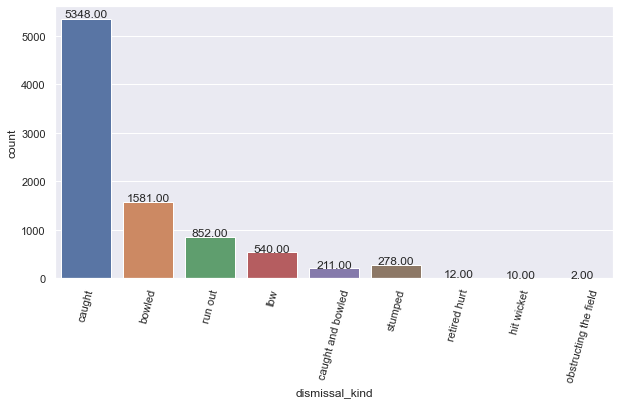

In [18]:
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height() * 1.01
            value = '{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

dismissal_kind = deliveries['dismissal_kind'].unique()
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.countplot(x='dismissal_kind', data=deliveries)
ax.tick_params(axis='x', rotation=75)
show_values_on_bars(ax)

### Top five scoring batsman

In [19]:
modified = deliveries.copy(deep=True)
# modified.drop(modified.iloc[:,0:6], inplace=True, axis=1)
# modified.drop(modified.iloc[:,1:5], inplace=True, axis=1)

runs_by_each = modified.groupby(['batsman']).sum()['batsman_runs']
top_five = runs_by_each.nlargest(5)
top_five

batsman
V Kohli      5434
SK Raina     5415
RG Sharma    4914
DA Warner    4741
S Dhawan     4632
Name: batsman_runs, dtype: int64

### Overwise statistics

In [20]:
overwise = deliveries.copy(deep=True)
overwise.drop(['fielder','dismissal_kind'], axis=1, inplace=True)
overwise.fillna(0, inplace=True)
overwise['player_dismissed'] = overwise['player_dismissed'].apply(lambda x: 1 if x!=0 else 0)
overwise.head(3)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,0
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,0
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,0


In [ ]:
overwise_data = overwise.groupby(['match_id','inning','over'])
stats = {'match_id':[],'inning':[],'over':[],'batting_team':[],'bowling_team':[],'extra_runs':[],'wickets':[],'batsman_runs':[],
        'bowler':[],'total_runs':[]}

for i in overwise_data.indices:
    stats['match_id'].append(i[0])
    stats['inning'].append(i[1])
    stats['over'].append(i[2])
    
    df = overwise_data.get_group(i)
    stats['batting_team'].append(df['batting_team'].iloc[0])
    stats['bowling_team'].append(df['bowling_team'].iloc[0])
    stats['bowler'].append(df['bowler'].iloc[0])
    
    extras = df['extra_runs'].sum()
    stats['extra_runs'].append(extras)
    dismissals = df['player_dismissed'].sum()
    stats['wickets'].append(dismissals)
    runs = df['batsman_runs'].sum()
    stats['batsman_runs'].append(runs)
    stats['total_runs'].append(extras + runs)
    
overwise_stats = pd.DataFrame(stats)
overwise_stats.head(3)

### Mean runs in each over

In [ ]:
mean_runs = overwise_stats.groupby(['over'])['batsman_runs'].mean()
g = sns.lineplot(x=overwise_stats['over'], y=mean_runs, data=overwise_stats)
g.set_xticks(range(1,21))
g.set_xticklabels([str(i) for i in range(1,21)])

### Mean fall of wickets in each over

In [ ]:
mean_fall_of_wickets = overwise_stats.groupby(['over'])['wickets'].mean()
g = sns.lineplot(x=overwise_stats['over'], y=mean_fall_of_wickets, data=overwise_stats)
g.set_xticks(range(1,21))
g.set_xticklabels([str(i) for i in range(1,21)])

In [ ]:
def get_highest_scoring_batsman_in_match(match_id: int):
    subset = deliveries[deliveries['match_id'] == match_id]
    # group is a 'pandas.core.series.Series' object
    group = subset.groupby(['batsman'])['batsman_runs'].sum()
    highest = group[group == group.agg('max')]
    return highest

highest_scoring_batsman = {'id':[],'name':[],'runs_scored':[]}
for match in deliveries['match_id'].unique():
    data = get_highest_scoring_batsman_in_match(match)
    highest_scoring_batsman['id'].append(match)
    highest_scoring_batsman['name'].append(data.index[0])
    highest_scoring_batsman['runs_scored'].append(data[0])

highest_scoring_batsman_data = pd.DataFrame(highest_scoring_batsman)
merged = pd.merge(highest_scoring_batsman_data, match_data[['id','player_of_match']])
merged.head()

In [ ]:
merged

In [ ]:
print('Highest number of runs scored in a match is {} by {}'.format(merged['runs_scored'].max(), merged.iloc[merged['runs_scored'].idxmax()]['name']))

In [ ]:
player_highest_runs = merged[merged['player_of_match']==merged['name']]
print("Matches when the highest scoring batsman is the player of the match is {}".format(len(player_highest_runs)))

### Distribution of highest runs scored in a match

In [ ]:
ax = sns.histplot(x='runs_scored', data=merged, kde=True)

# Model building

team1, team2, team1_toss_win, team1_toss_bat, team1_win, city, team1_runs

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
match_data_copy = match_data.copy(deep=True)
match_data_copy.head()

In [ ]:
match_data.head()

In [ ]:
copy_overwise = overwise_stats.copy(deep=True)
copy_overwise.replace('Rising Pune Supergiant','Rising Pune Supergiants', inplace=True)
copy_overwise.head()

In [ ]:
copy_match = match_data.copy()
copy_match.head()

In [ ]:
obj = copy_overwise.groupby(['match_id','inning'])
obj.sum()

In [ ]:
copy_match.loc[copy_match['id'] == 1]

In [ ]:
copy_overwise.rename(columns={'match_id':'id'}, inplace=True)

new_df = pd.merge(copy_overwise, copy_match, how='inner', on='id')
new_df.head()

In [ ]:
new_new_df = new_df.loc[new_df['winner'] == new_df['batting_team']]
new_new_df = new_new_df[new_new_df['inning'] <= 2]
columns = ['id','inning','batting_team','toss_winner','toss_decision','city','winner','total_runs','wickets']
new_new_df = new_new_df[columns]
new_new_df.rename(columns={'total_runs':'over_runs'}, inplace=True)
new_new_df.head()

In [ ]:
new_new_df.groupby(['id','inning']).cumsum()

In [ ]:
new_new_df['cum_score_6'] = new_new_df.groupby(['id','inning']).cumsum()['over_runs']
new_new_df['fall_wickets_6'] = new_new_df.groupby(['id','inning']).cumsum()['wickets']

new_new_df.head(20)

In [ ]:
new_obj = new_new_df.groupby(['id','inning'])

columns = ['id','inning','batting_team','toss_winner','toss_decision','city','winner','cum_score_6']

# Last over data
# final = new_obj.last()

# 6th over data
final = new_obj.nth(5)
final['final_20'] = new_obj.last()['cum_score_6']
final.reset_index(inplace=True)
final.rename(columns={'over_runs':'last_over'}, inplace=True)
final.head()

In [ ]:
final.replace('Kochi Tuskers Kerala','Deccan Chargers', inplace=True)
final.replace('Delhi Capitals','Delhi Daredevils', inplace=True)
final.replace('Pune Warriors','Sunrisers Hyderabad', inplace=True)
final.replace('Gujarat Lions','Rajasthan Royals', inplace=True)
final.replace('Rising Pune Supergiants','Chennai Super Kings', inplace=True)

In [ ]:
final.groupby(['batting_team']).sum()

In [ ]:
all_runs = dict(final.groupby(['batting_team']).sum()['final_20'])
num_games = dict(final['batting_team'].value_counts())

bat_avg = {k:all_runs[k]/num_games[k] for k in all_runs }
bat_avg

In [ ]:
all_6_runs = dict(final.groupby(['batting_team']).sum()['cum_score_6'])

run_rate_6 = {k:all_6_runs[k]/(num_games[k]*6) for k in all_runs }
run_rate_6

In [ ]:
def label_row_bat_avg(row):
    return bat_avg[row['batting_team']]

In [ ]:
final['batting_avg'] = final.apply(lambda row: label_row_bat_avg(row), axis=1)
final.head()

In [ ]:
def label_row_run_rate(row):
    return run_rate_6[row['batting_team']]

In [ ]:
final['run_rate_6'] = final.apply(lambda row: label_row_run_rate(row), axis=1)
final.head()

### Winning team batting data

In [ ]:
final.head()

In [ ]:
final['inning'].unique()

In [ ]:
final.to_csv('./dataset/ipl/prediction_df.csv')

## Model formulation

In [ ]:
X = final.drop(columns=['id','inning','toss_winner','winner','wickets','final_20','city','toss_decision','total_runs'])
X = pd.get_dummies(data=X, drop_first=True)
X.head()

In [ ]:
Y = final['final_20']
Y.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=101)

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

In [ ]:
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter.transpose()

In [ ]:
predictions = model.predict(X_test)
predictions[:5]

In [ ]:
sns.scatterplot(range(len(y_test)),y_test)

In [ ]:
sns.regplot(y_test,predictions)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mse = mean_squared_error(y_test.values, predictions)
r2 = r2_score(y_test.values, predictions)
print("MSE: ", mse)
print("R2 Score: ", r2)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(max_depth=3)
regressor.fit(X_train, y_train)

In [ ]:
predictions = regressor.predict(X_test)
predictions[:5]

In [ ]:
sns.regplot(y_test,predictions)

In [ ]:
mse = mean_squared_error(y_test.values, predictions)
r2 = r2_score(y_test.values, predictions)
print("MSE: ", mse)
print("R2 Score: ", r2)

In [ ]:
d = []
rmse = []
r2s = []
for i in range(1, 30):
    model = DecisionTreeRegressor(max_depth=i)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    r2 = r2_score(y_test.values, predictions)
    mse = mean_squared_error(y_test.values, predictions)
    _rmse = np.sqrt(mse)
    d.append(i)
    rmse.append(_rmse)
    r2s.append(r2)

In [ ]:
sns.lineplot(d,rmse)

## KNN Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=69)
model.fit(X_train, y_train)

In [ ]:
predictions = model.predict(X_test)
predictions[:5]

In [ ]:
sns.regplot(y_test,predictions)

In [ ]:
mse = mean_squared_error(y_test.values, predictions)
r2 = r2_score(y_test.values, predictions)
print("MSE: ", mse)
print("R2 Score: ", r2)

RMSE vs K values

In [ ]:
k = []
rmse = []
r2s = []
for i in range(3, 80):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    r2 = r2_score(y_test.values, predictions)
    mse = mean_squared_error(y_test.values, predictions)
    _rmse = np.sqrt(mse)
    k.append(i)
    rmse.append(_rmse)
    r2s.append(r2)

In [ ]:
sns.lineplot(k, rmse)